In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/data.csv')

# Display the first few rows of the DataFrame
print("DataFrame Head:")
print(df.head())

# Display the column names
print("\nDataFrame Columns:")
print(df.columns)

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

DataFrame Head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_w

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target variable (y)
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df['diagnosis']

# 2. Convert the 'diagnosis' target variable y into a numerical format
y = y.map({'M': 1, 'B': 0})

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Target variable value counts (y_train):\n", y_train.value_counts())
print("Target variable value counts (y_test):\n", y_test.value_counts())

Shape of X_train_scaled: (455, 30)
Shape of X_test_scaled: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)
Target variable value counts (y_train):
 diagnosis
0    285
1    170
Name: count, dtype: int64
Target variable value counts (y_test):
 diagnosis
0    72
1    42
Name: count, dtype: int64


In [3]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Confusion Matrix:
[[71  1]
 [ 3 39]]

Precision: 0.9750
Recall: 0.9286
ROC-AUC Score: 0.9960


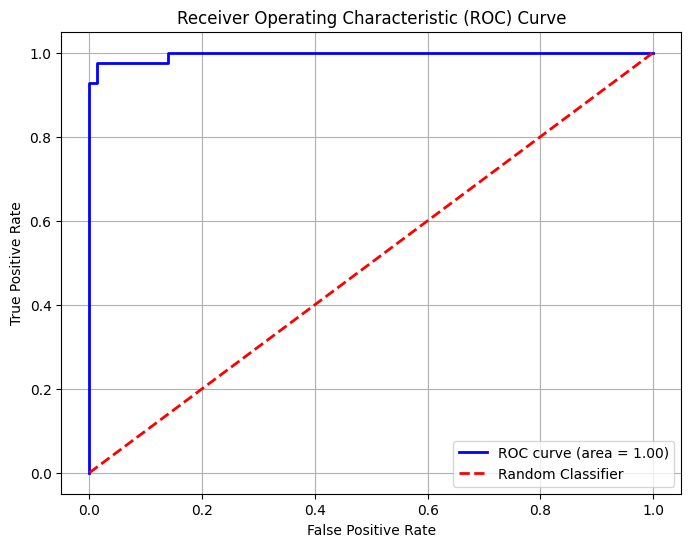

In [4]:
from sklearn import metrics
import matplotlib.pyplot as plt

# 1. Predict the probabilities for the positive class (class 1) on the X_test_scaled data
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 2. Predict the class labels on the X_test_scaled data
y_pred = model.predict(X_test_scaled)

# 3. Calculate and print the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 4. Calculate and print the precision score
precision = metrics.precision_score(y_test, y_pred)
print(f"\nPrecision: {precision:.4f}")

# 5. Calculate and print the recall score
recall = metrics.recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# 6. Calculate and print the ROC-AUC score
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 7. Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# 8. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [5]:
import numpy as np
from sklearn import metrics

# Review original metrics (for comparison)
print("Original Metrics (Threshold = 0.5):")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print("  Confusion Matrix:\n", conf_matrix)

# 2. Choose a new classification threshold (e.g., 0.3)
new_threshold = 0.3
print(f"\nApplying new threshold: {new_threshold}")

# 3. Recalculate predicted class labels using the new threshold
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

# 4. Calculate and print the confusion matrix for the new threshold
conf_matrix_new = metrics.confusion_matrix(y_test, y_pred_new_threshold)
print("Confusion Matrix (New Threshold):")
print(conf_matrix_new)

# 4. Calculate and print the precision score for the new threshold
precision_new = metrics.precision_score(y_test, y_pred_new_threshold)
print(f"\nPrecision (New Threshold): {precision_new:.4f}")

# 4. Calculate and print the recall score for the new threshold
recall_new = metrics.recall_score(y_test, y_pred_new_threshold)
print(f"Recall (New Threshold): {recall_new:.4f}")

# 5. Compare the new metrics with the original metrics
print("\nComparison:")
print(f"  Original Precision (0.5): {precision:.4f} vs New Precision ({new_threshold}): {precision_new:.4f}")
print(f"  Original Recall (0.5): {recall:.4f} vs New Recall ({new_threshold}): {recall_new:.4f}")
print("  By lowering the threshold, we generally increase recall (identify more positive cases) at the cost of precision (more false positives).")

Original Metrics (Threshold = 0.5):
  Precision: 0.9750
  Recall: 0.9286
  Confusion Matrix:
 [[71  1]
 [ 3 39]]

Applying new threshold: 0.3
Confusion Matrix (New Threshold):
[[71  1]
 [ 1 41]]

Precision (New Threshold): 0.9762
Recall (New Threshold): 0.9762

Comparison:
  Original Precision (0.5): 0.9750 vs New Precision (0.3): 0.9762
  Original Recall (0.5): 0.9286 vs New Recall (0.3): 0.9762
  By lowering the threshold, we generally increase recall (identify more positive cases) at the cost of precision (more false positives).
